## Predict whether the client has subscribed a term deposit or not -("yes" or "no")


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from ml_metrics import mse
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import statsmodels.api as sm
print("Libraries Imported!")

Libraries Imported!


In [42]:
# loading csv data into dataframe and viewing
df=pd.read_csv("H:/ExcelR Data Science/datasets_BA/bank-full.csv",sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
df.shape

(45211, 17)

In [44]:
# Dropping irrelevant columns
df.drop(df.columns[[8,9,10,11,12,13,14,15]],axis=1,inplace=True)
df.rename(columns={'y':'Deposit_Subscribed'},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,Deposit_Subscribed
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no


In [45]:
# checking for null values in entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 45211 non-null  int64 
 1   job                 45211 non-null  object
 2   marital             45211 non-null  object
 3   education           45211 non-null  object
 4   default             45211 non-null  object
 5   balance             45211 non-null  int64 
 6   housing             45211 non-null  object
 7   loan                45211 non-null  object
 8   Deposit_Subscribed  45211 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


In [46]:
df.drop_duplicates(keep=False,inplace=True)

In [47]:
print("Shape of dataframe after dropping duplicates:",df.shape)

Shape of dataframe after dropping duplicates: (39035, 9)


In [48]:
# checking unique values in job column
df['job'].unique()

array(['management', 'technician', 'blue-collar', 'unknown',
       'entrepreneur', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [49]:
#checking unique values in education column
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [50]:
# Dropping rows having 'unknown' education and job
df.drop(df[df['job']=='unknown'].index,inplace=True)
df.drop(df[df['education']=='unknown'].index,inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,Deposit_Subscribed
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,35,management,married,tertiary,no,231,yes,no,no
3,28,management,single,tertiary,no,447,yes,yes,no
4,42,entrepreneur,divorced,tertiary,yes,2,yes,no,no


In [51]:
print("final shape of dataframe after dropping rows:",df.shape)

final shape of dataframe after dropping rows: (37201, 9)


In [52]:
df1=df.copy()

In [53]:
# Applying Label Encoder to all categorical columns
label_encoder=preprocessing.LabelEncoder()
df1['job']= label_encoder.fit_transform(df1['job'])
df1['marital']= label_encoder.fit_transform(df1['marital'])
df1['education']= label_encoder.fit_transform(df1['education'])
df1['default']= label_encoder.fit_transform(df1['default'])
df1['housing']= label_encoder.fit_transform(df1['housing'])
df1['loan']= label_encoder.fit_transform(df1['loan'])
df1['Deposit_Subscribed']= label_encoder.fit_transform(df1['Deposit_Subscribed'])

In [54]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,Deposit_Subscribed
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,35,4,1,2,0,231,1,0,0
3,28,4,2,2,0,447,1,1,0
4,42,2,0,2,1,2,1,0,0


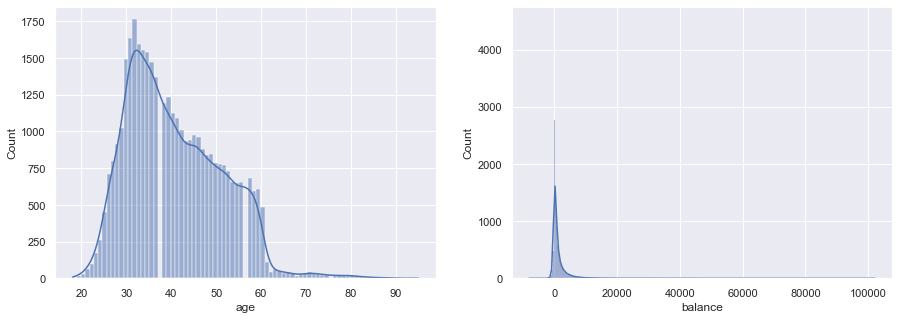

In [55]:
# checking distribution of the two numeric columns-age and balance
sns.set(rc={"figure.figsize": (15,5)})
#creating first plot 
plt.subplot(1,2,1)
ax=sns.histplot(x='age',data=df1,kde=True)
plt.subplot(1,2,2)
sns.histplot(x='balance',data=df1,kde=True)

 Age distributions is right-skewed and Balance distribution is extremely right skewed.

## Checking whether the given data is balanced or imbalanced

In [56]:
# Number of data labelled as 1
(df1['Deposit_Subscribed']==1).sum()

3962

In [57]:
# Number of data labelled as 0
(df1['Deposit_Subscribed']==0).sum()

33239

In [58]:
# percent of data labelled as 1(subscribed)
(df1['Deposit_Subscribed']==1).sum()/df1.shape[0]*100

10.650251337329642

In [59]:
# percent of data labelled as 0(not subscribed)
(df1['Deposit_Subscribed']==0).sum()/df1.shape[0]*100

89.34974866267036

Output variable has 10.65% data labelled as 1 and 89.35% data labelled as 0. Hence the given dataset is imbalanced or biased.

H:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


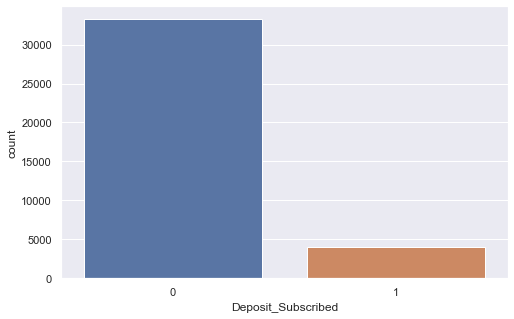

In [60]:
# Exploring output variable(Y) 
plt.figure(figsize=(8,5))
sns.countplot('Deposit_Subscribed',data=df1)


We can see number of people who did not subscribe is way more than people who subscribed for the deposit

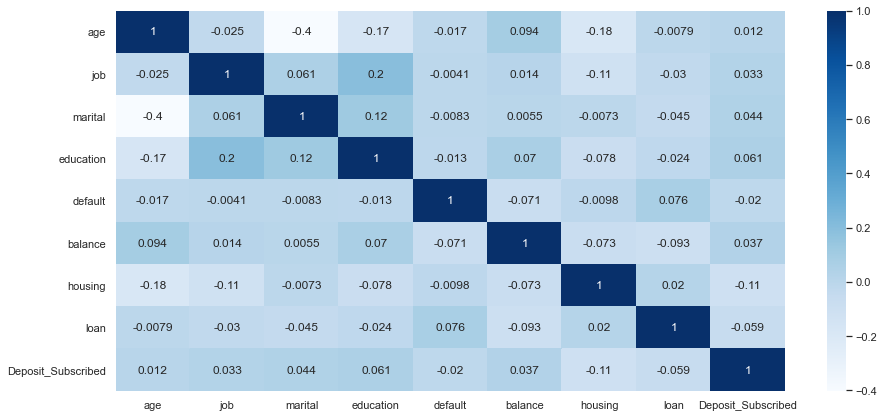

In [61]:
# Checking correlation 
plt.figure(figsize=(15,7))
ax = sns.heatmap(df1.corr(),annot=True,cmap='Blues') 

In [62]:
df2=df1.copy()

In [63]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,Deposit_Subscribed
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,35,4,1,2,0,231,1,0,0
3,28,4,2,2,0,447,1,1,0
4,42,2,0,2,1,2,1,0,0


In [64]:
# Normalizing age and balance columns
from sklearn.preprocessing import MinMaxScaler
age_ar=df2['age'].values.reshape(-1,1)
balance_ar=df2['balance'].values.reshape(-1,1)
scaler=MinMaxScaler()
df2['age']=scaler.fit_transform(age_ar)
df2['balance']=scaler.fit_transform(balance_ar)

In [65]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,Deposit_Subscribed
0,0.519481,4,1,2,0,0.092259,1,0,0
1,0.337662,9,2,1,0,0.073067,1,0,0
2,0.220779,4,1,2,0,0.074901,1,0,0
3,0.129870,4,2,2,0,0.076862,1,1,0
4,0.311688,2,0,2,1,0.072822,1,0,0


In [66]:
# Splitting data into X and y
X=df2.iloc[:,:-1]
Y=df2.iloc[:,-1]

In [67]:
model1=sm.Logit(Y,X).fit()

Optimization terminated successfully.
         Current function value: 0.338988
         Iterations 7


In [68]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Deposit_Subscribed   No. Observations:                37201
Model:                          Logit   Df Residuals:                    37193
Method:                           MLE   Df Model:                            7
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:               0.0004485
Time:                        10:54:06   Log-Likelihood:                -12611.
converged:                       True   LL-Null:                       -12616.
Covariance Type:            nonrobust   LLR p-value:                    0.1254
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -1.7661      0.122    -14.523      0.000      -2.004      -1.528
job           -0.0188      0.005     -3.624      0.000      -0.029      -0.009
marital       -0.1820      0.026     -6.932      0.000      -0.233      -0.131
education      0.0158      0.025      0.631      0.528      -0.033       0.065
default       -0.6756      0.152     -4.455      0.000      -0.973      -0.378
balance       -8.2241      0.695    -11.831      0.000      -9.587      -6.862
housing       -0.9573      0.033    -29.043      0.000      -1.022      -0.893
loan          -0.7185      0.053    -13.582      0.000      -0.822      -0.615
==============================================================================
"""

P-value of education is more than 0.05 so it is insignificant here.

In [69]:
pred1=model1.predict()
y_pred1 = list(map(round,pred1))

In [70]:
# Calculating RMSE 
from ml_metrics import rmse
rmse1=rmse(Y,y_pred1)
print("RMSE for first model is:",rmse1)

RMSE for first model is: 0.32634722822983564


In [71]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import (confusion_matrix,accuracy_score)
confusion_matrix1 = confusion_matrix(Y,y_pred1)
accuracy_score1=accuracy_score(Y,y_pred1)
print(confusion_matrix1)
print("The accuracy score is:",accuracy_score1)

[[33239     0]
 [ 3962     0]]
The accuracy score is: 0.8934974866267036


From Confusion Matrix it can be seen that:
1. (Actual=0)33239 data points were correctly predicted as 0.
2. (Actual=1)0 datapoints were correctly labelled as 1.

In [72]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred1));

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     33239
           1       0.00      0.00      0.00      3962

    accuracy                           0.89     37201
   macro avg       0.45      0.50      0.47     37201
weighted avg       0.80      0.89      0.84     37201



H:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 2- Dropping education column

In [74]:
df3=df2.drop('education',axis=1)
df3.head()

,age,job,marital,default,balance,housing,loan,Deposit_Subscribed
0,0.519481,4,1,0,0.092259,1,0,0
1,0.337662,9,2,0,0.073067,1,0,0
2,0.220779,4,1,0,0.074901,1,0,0
3,0.129870,4,2,0,0.076862,1,1,0
4,0.311688,2,0,1,0.072822,1,0,0


In [75]:
# Splitting data into X and y
X=df3.iloc[:,:-1]
Y=df3.iloc[:,-1]

In [76]:
model2=sm.Logit(Y,X).fit()

Optimization terminated successfully.
         Current function value: 0.338993
         Iterations 7


In [77]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Deposit_Subscribed   No. Observations:                37201
Model:                          Logit   Df Residuals:                    37194
Method:                           MLE   Df Model:                            6
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:               0.0004327
Time:                        10:54:07   Log-Likelihood:                -12611.
converged:                       True   LL-Null:                       -12616.
Covariance Type:            nonrobust   LLR p-value:                   0.09092
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -1.7686      0.121    -14.572      0.000      -2.007      -1.531
job           -0.0180      0.005     -3.577      0.000      -0.028      -0.008
marital       -0.1792      0.026     -6.927      0.000      -0.230      -0.128
default       -0.6747      0.152     -4.449      0.000      -0.972      -0.377
balance       -8.0761      0.653    -12.372      0.000      -9.356      -6.797
housing       -0.9576      0.033    -29.061      0.000      -1.022      -0.893
loan          -0.7178      0.053    -13.572      0.000      -0.821      -0.614
==============================================================================
"""

In [78]:
# Finding predicted values
pred2=model2.predict()
y_pred2 = list(map(round,pred2))

In [79]:
rmse2=rmse(Y,y_pred2)
print("RMSE for second model is:",rmse2)

RMSE for second model is: 0.32634722822983564


In [95]:
# Confusion Matrix for the model accuracy

confusion_matrix2 = confusion_matrix(Y,y_pred2)
accuracy_score2=accuracy_score(Y,y_pred2)
print(confusion_matrix2)
print("The accuracy score is:",accuracy_score2)

[[33239     0]
 [ 3962     0]]
The accuracy score is: 0.8934974866267036


Dropping the education column has not led to an increase in accuracy.

### Though the accuracy is high(88.36) and rmse is low(0.34) , it is not a good model as the data is biased or imbalanced. 

### The precision values substantiate this point. Precision value for label 0 is 0.88 whereas for label 1 is 0. This means the model can accurately predict only the 0 labelled data .

### We have seen that the data has 89% of 0 labelled data so its biased towards 0.Hence the model has picked up predicting 0 labels with far more accuracy than 1. 